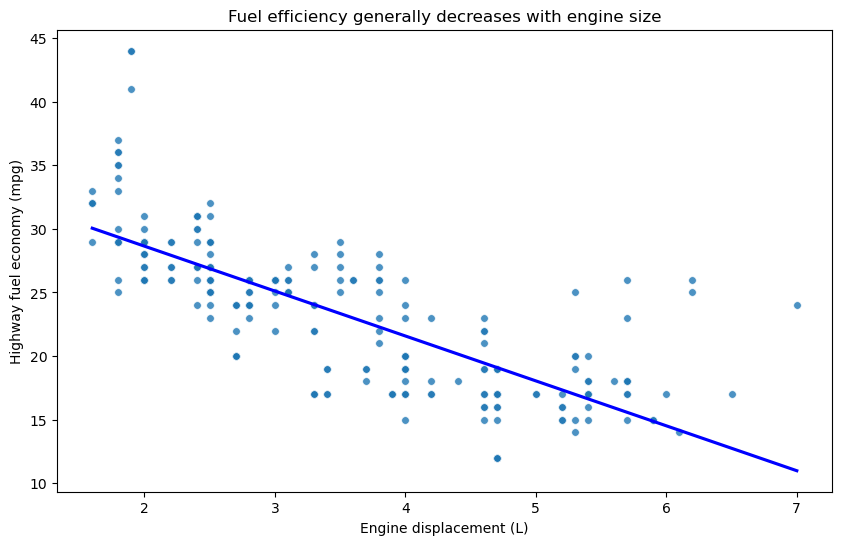

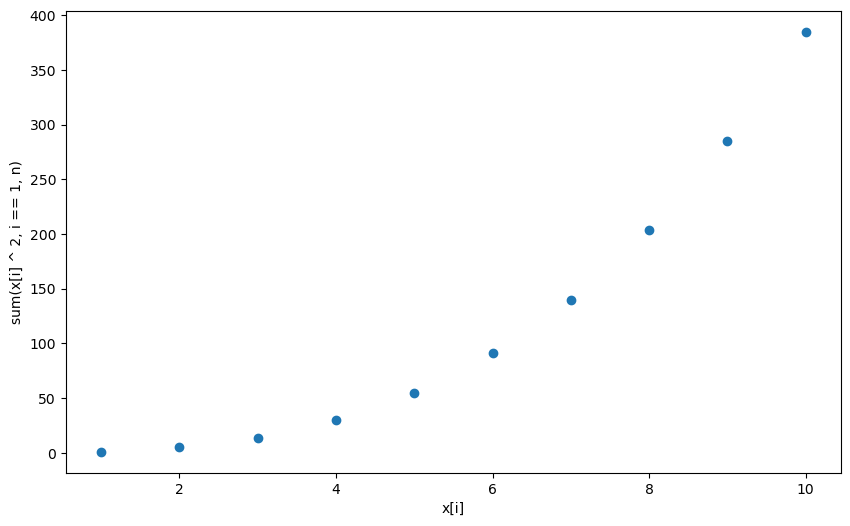

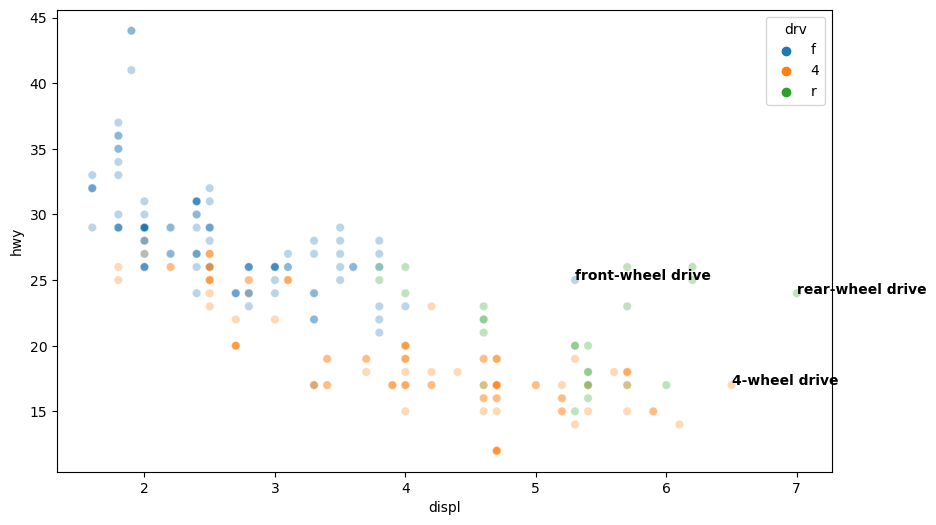

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the datasets into pandas DataFrames
mpg = pd.read_csv('data/mpg.csv')
diamonds = pd.read_csv('data/diamonds.csv')

# 1. Basic scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='displ', y='hwy', data=mpg, scatter_kws={'s': 30, 'edgecolor': 'white', 'linewidth': 0.5}, line_kws={'color': 'blue'}, ci=None)
plt.xlabel('Engine displacement (L)')
plt.ylabel('Highway fuel economy (mpg)')
plt.title('Fuel efficiency generally decreases with engine size')
plt.show()

# 2. Basic plot of x vs cumulative sum of x^2
df = pd.DataFrame({
    'x': np.arange(1, 11),
    'y': np.cumsum(np.arange(1, 11) ** 2)
})
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], 'o')
plt.xlabel('x[i]')
plt.ylabel('sum(x[i] ^ 2, i == 1, n)')
plt.show()

# 3. Scatter plot with labels for drive type
def label_drive(row):
    if row['drv'] == 'f':
        return 'front-wheel drive'
    elif row['drv'] == 'r':
        return 'rear-wheel drive'
    elif row['drv'] == '4':
        return '4-wheel drive'
    else:
        return np.nan

label_info = (mpg.sort_values(by='displ', ascending=False)
             .groupby('drv').head(1))
label_info['drive_type'] = label_info.apply(label_drive, axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=mpg, alpha=0.3)
for _, row in label_info.iterrows():
    plt.text(row['displ'], row['hwy'], row['drive_type'], fontsize=10, fontweight='bold')
plt.show()



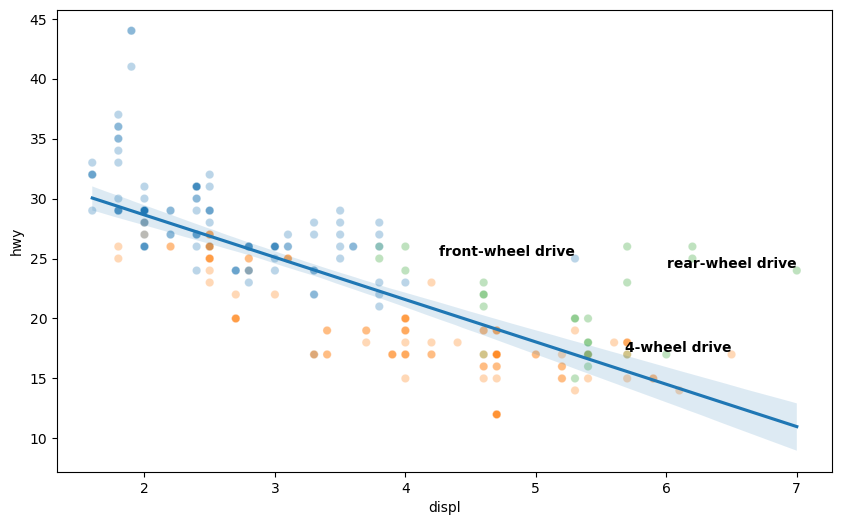

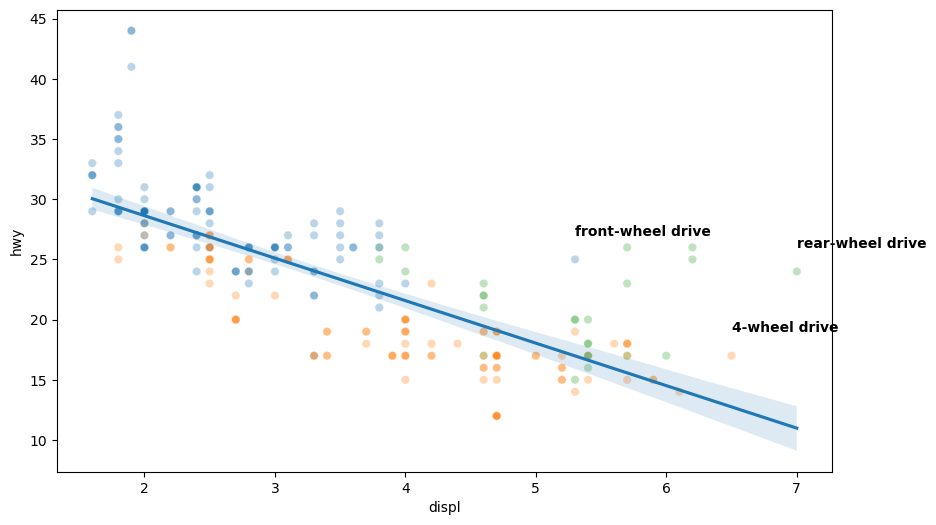

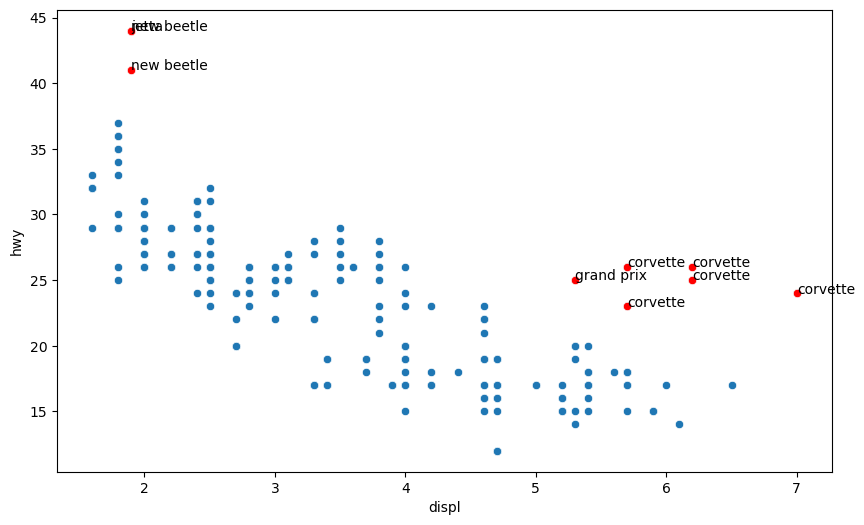

In [2]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv', alpha=0.3)
sns.regplot(data=mpg, x='displ', y='hwy', scatter=False, fit_reg=True)
for index, row in label_info.iterrows():
    plt.text(row['displ'], row['hwy'], row['drive_type'], fontweight='bold', horizontalalignment='right', verticalalignment='bottom')
plt.legend().set_visible(False)
plt.show()

# Note: Exact repelling functionality for labels is not present in seaborn; considering normal text plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv', alpha=0.3)
sns.regplot(data=mpg, x='displ', y='hwy', scatter=False, fit_reg=True)
for index, row in label_info.iterrows():
    plt.text(row['displ'], row['hwy'] + 2, row['drive_type'], fontweight='bold')
plt.legend().set_visible(False)
plt.show()

# Identify potential outliers
potential_outliers = mpg[(mpg['hwy'] > 40) | ((mpg['hwy'] > 20) & (mpg['displ'] > 5))]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy')
sns.scatterplot(data=potential_outliers, x='displ', y='hwy', color='red', s=60, facecolor="none")
sns.scatterplot(data=potential_outliers, x='displ', y='hwy', color='red')
for index, row in potential_outliers.iterrows():
    plt.text(row['displ'], row['hwy'], row['model'])
plt.show()


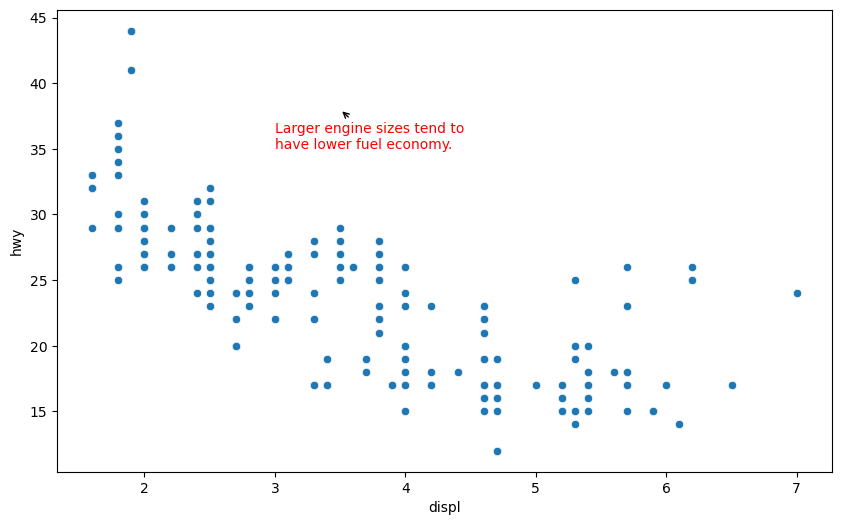

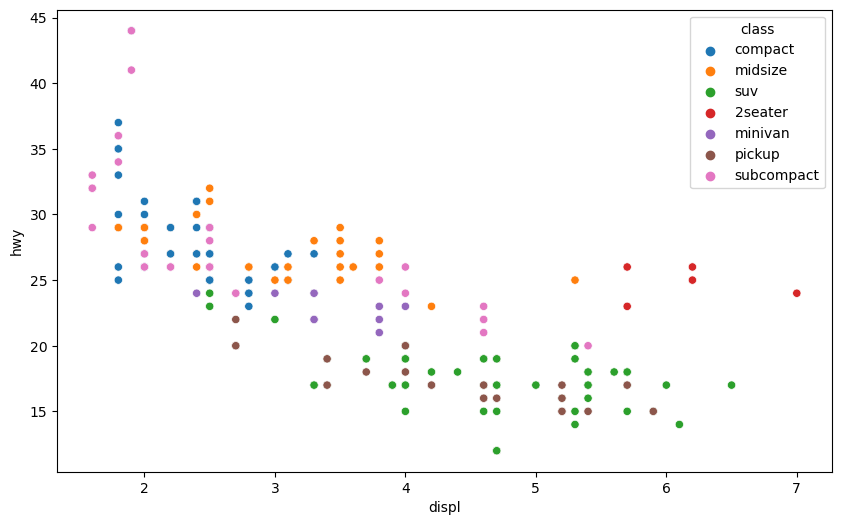

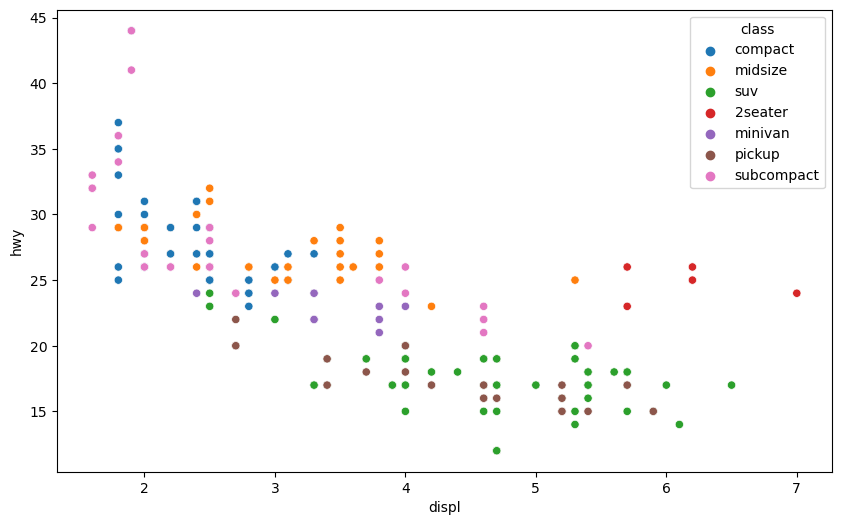

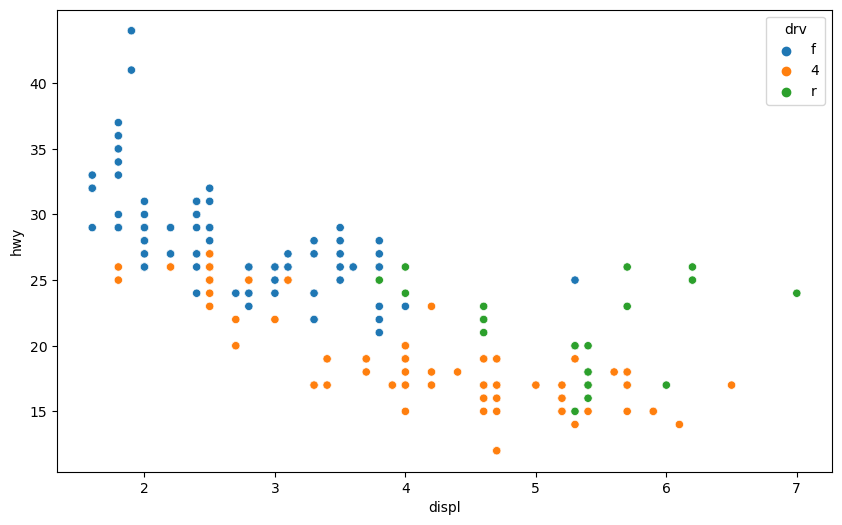

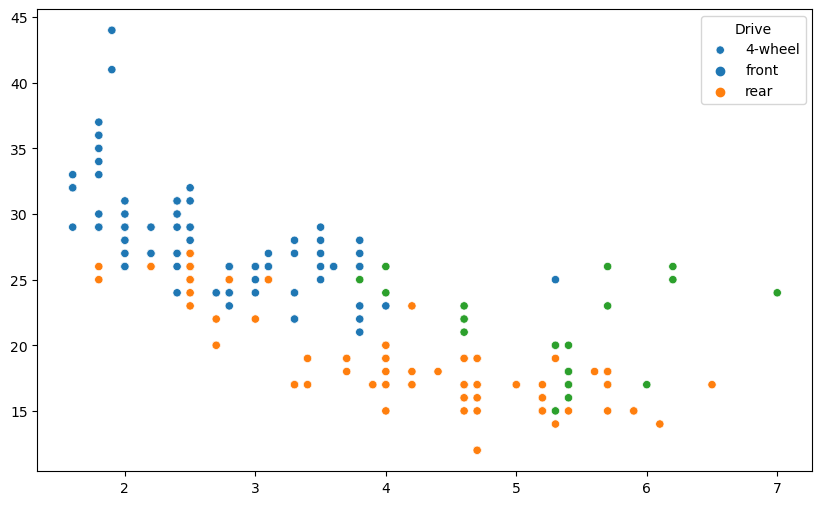

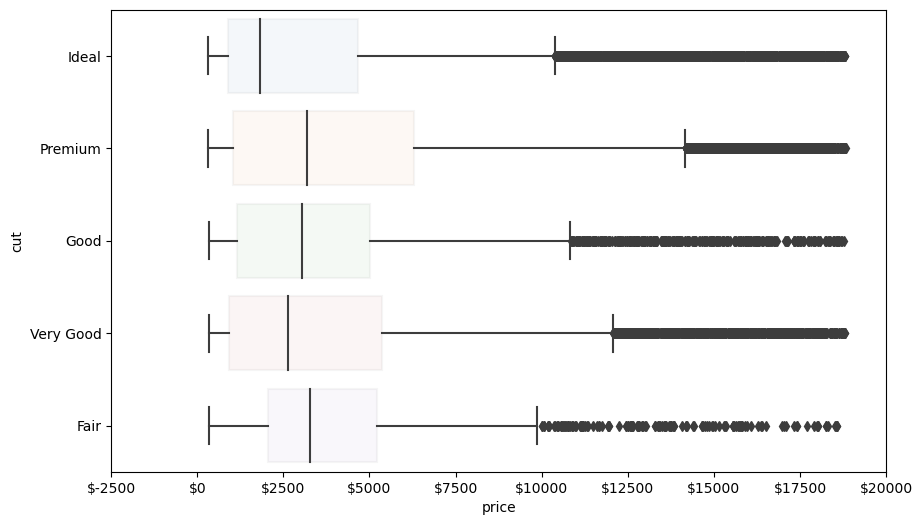

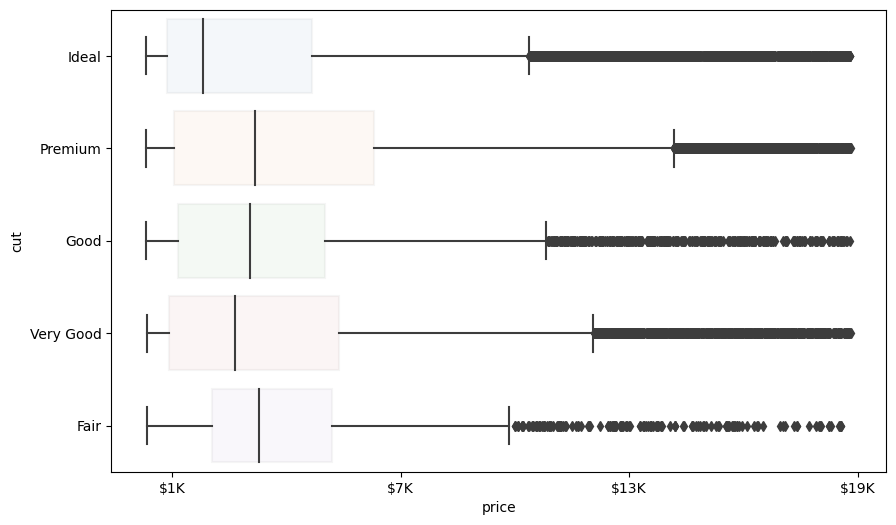

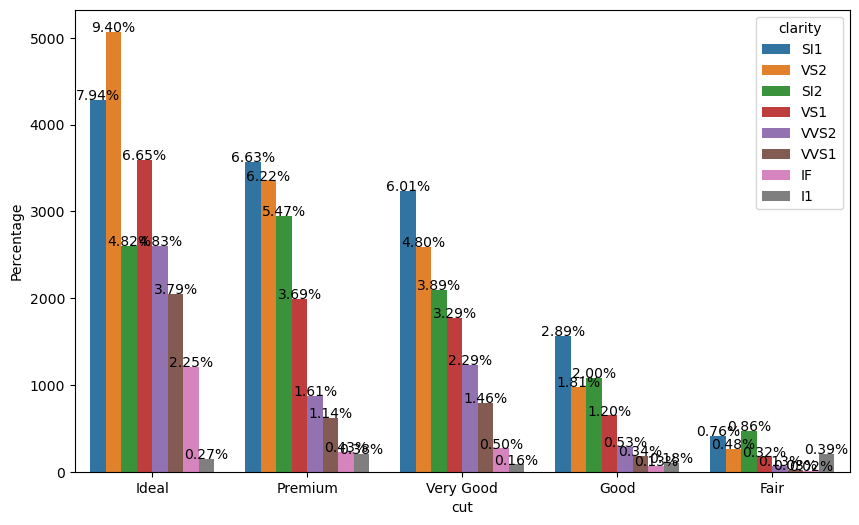

In [5]:
# First plot with annotation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy')
trend_text = "Larger engine sizes tend to\nhave lower fuel economy."
plt.annotate(trend_text, xy=(3.5, 38), xytext=(3, 35), arrowprops=dict(facecolor='red', arrowstyle='->'), color="red", ha="left")
plt.show()

# Second plot with color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
plt.show()

# Third plot (same as second but showcasing the default scales)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
plt.show()

# Fourth plot with y-axis breaks
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.yticks(ticks=range(15, 41, 5))
plt.show()

# Fifth plot with custom labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Drive', labels=['4-wheel', 'front', 'rear'])
plt.show()

# Sixth plot: diamonds boxplot
plt.figure(figsize=(10, 6))
# sns.boxplot(data=diamonds, x='price', y='cut', alpha=0.05)
boxprops = dict(alpha=0.05)
sns.boxplot(data=diamonds, x='price', y='cut', boxprops=boxprops)
# plt.show()
plt.xticks(ticks=plt.xticks()[0], labels=[f"${int(val)}" for val in plt.xticks()[0]])
plt.show()

# Seventh plot: diamonds boxplot with custom x scale
plt.figure(figsize=(10, 6))
boxprops = dict(alpha=0.05)
sns.boxplot(data=diamonds, x='price', y='cut', boxprops=boxprops)
xticks = list(range(1000, 19001, 6000))
plt.xticks(ticks=xticks, labels=[f"${int(val/1000)}K" for val in xticks])
plt.show()

# Eighth plot: diamonds bar plot with percentage y-axis
plt.figure(figsize=(10, 6))
clarity_order = diamonds['clarity'].value_counts().index
sns.countplot(data=diamonds, x='cut', hue='clarity', hue_order=clarity_order, order=diamonds['cut'].value_counts().index)
plt.ylabel('Percentage')
total = len(diamonds)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 2, '{:.2f}%'.format(100*height/total), 
                   ha='center', color='black', rotation=0)
plt.show()


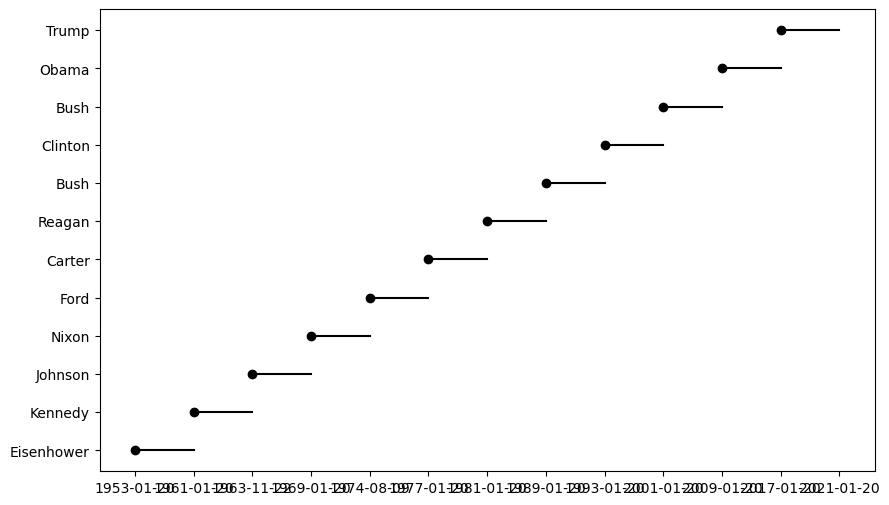

In [6]:
import numpy as np

presidential = pd.read_csv('data/presidential.csv')

presidential['id'] = 33 + np.arange(len(presidential))

plt.figure(figsize=(10, 6))
for idx, row in presidential.iterrows():
    plt.plot([row['start'], row['end']], [row['id'], row['id']], c='black')
    plt.scatter(row['start'], row['id'], c='black')
plt.yticks(presidential['id'], presidential['name'])
plt.xlabel(None)
plt.show()

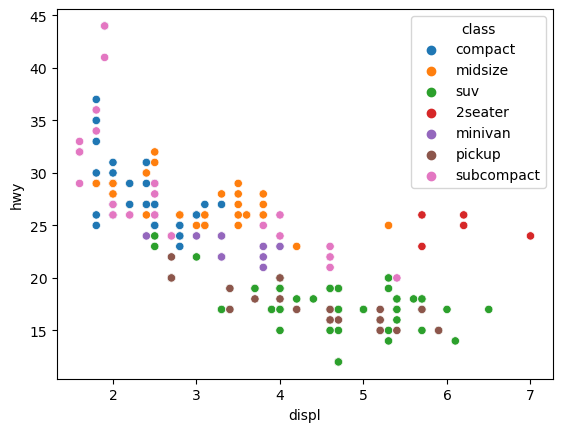

In [10]:
# mpg = pd.read_csv('data/mpg.csv')

base = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
plt.show()

# For the 'top' and 'bottom' legend positions, you'll need to manipulate the legend a bit more, for example:
# base.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)


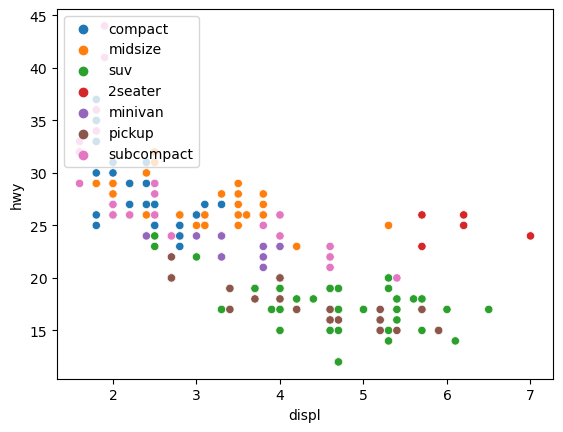

In [12]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

# Adjusting the legend position
plt.legend(loc='upper left')
plt.show()

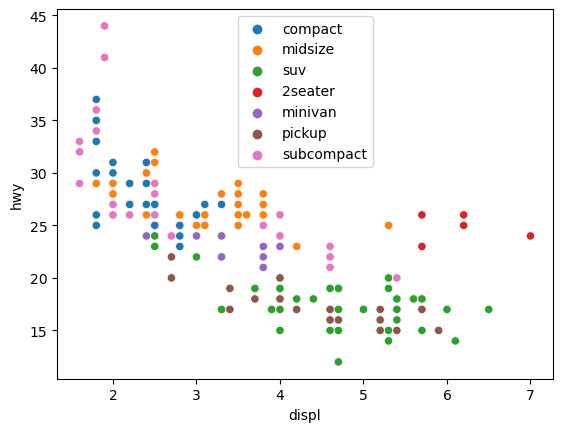

In [14]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

# Adjusting the legend position
plt.legend(loc='upper center')
plt.show()

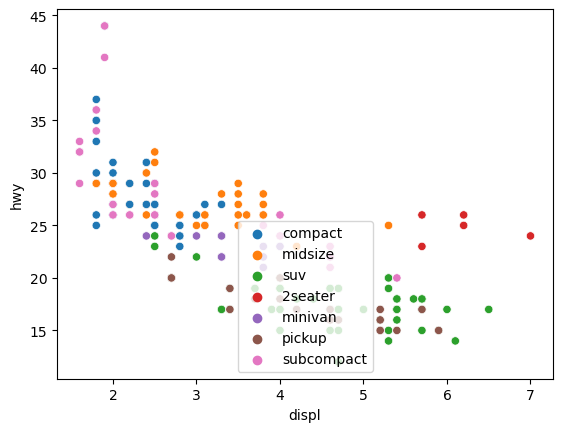

In [16]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

# Adjusting the legend position
plt.legend(loc='lower center')
plt.show()

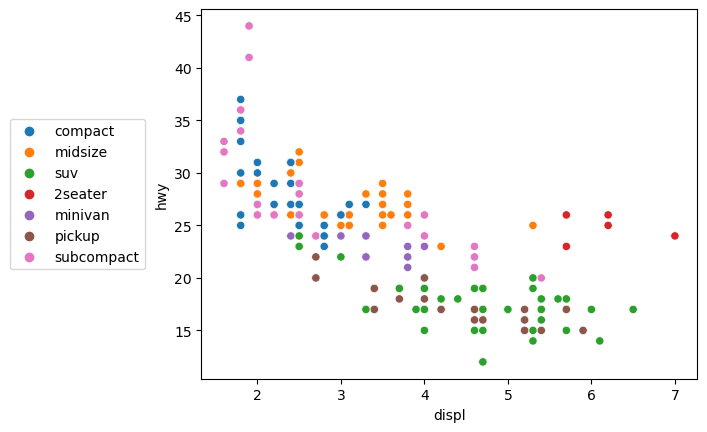

In [21]:
# Create the plot
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

# Position the legend in the middle on the left side
plt.legend(loc='center left', bbox_to_anchor=(-0.4, 0.5))
plt.show()

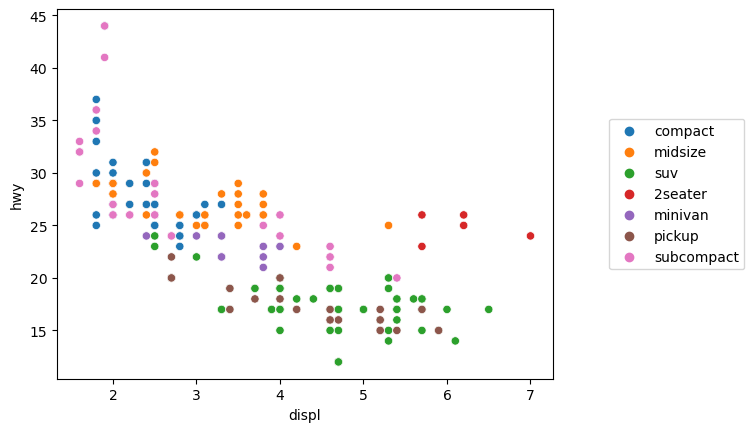

In [23]:
# Create the plot
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

# Position the legend in the middle on the left side
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()


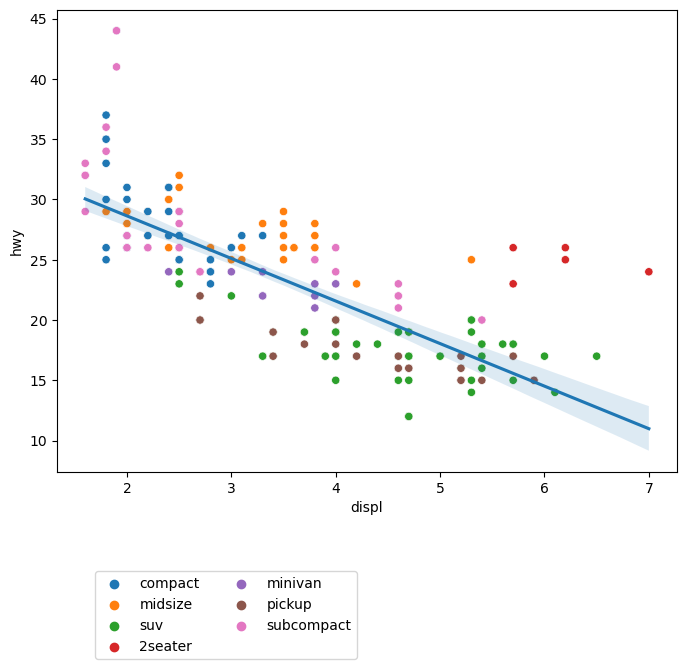

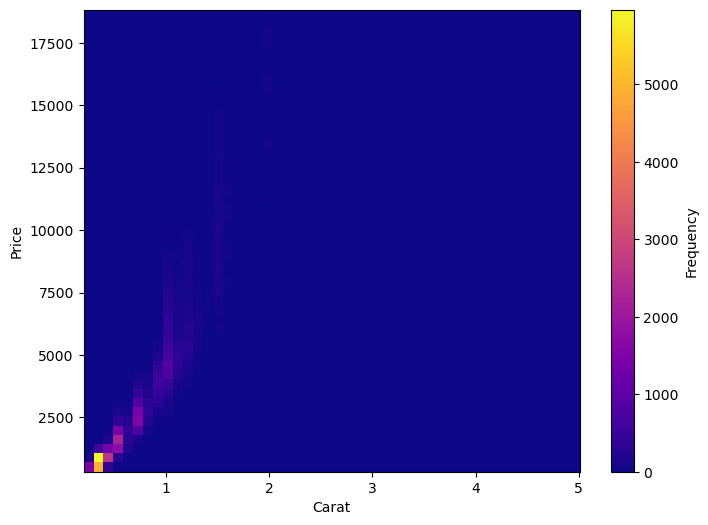

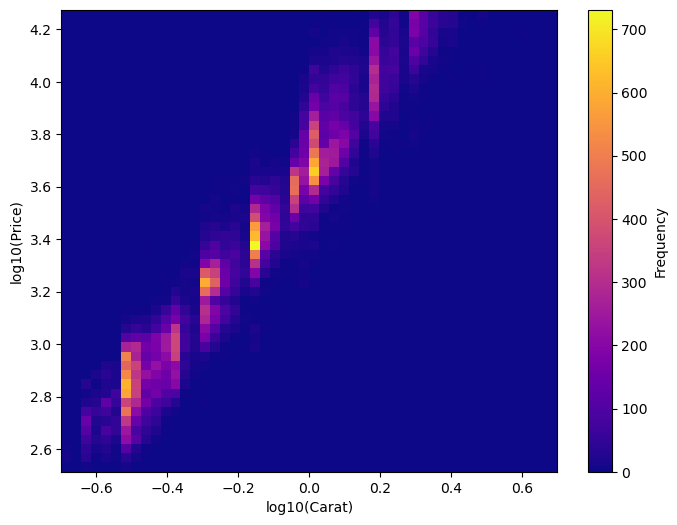

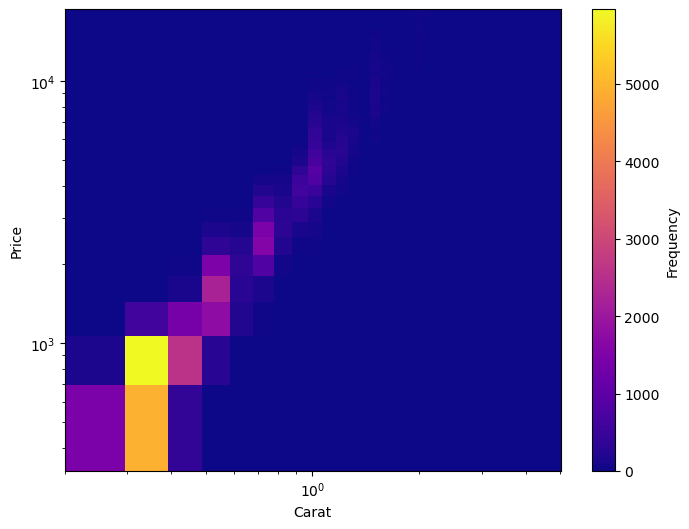

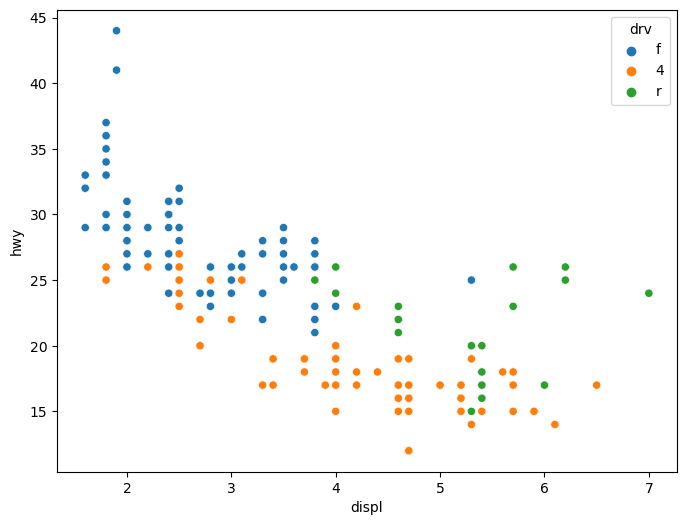

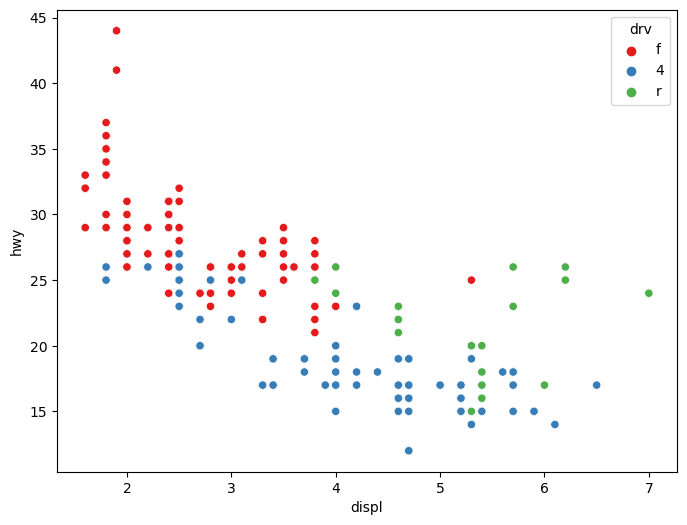

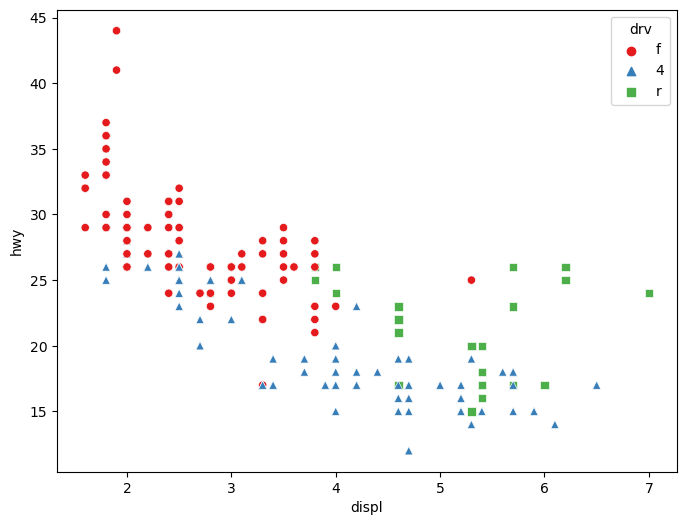

In [24]:
import numpy as np
from scipy.stats import zscore

# 1. mpg scatter with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.regplot(data=mpg, x='displ', y='hwy', scatter=False)
plt.legend(loc='upper left', bbox_to_anchor=(0.05, -0.2), ncol=2)
plt.show()

# 2. diamonds 2D histogram
plt.figure(figsize=(8,6))
plt.hist2d(diamonds['carat'], diamonds['price'], bins=50, cmap='plasma')
plt.colorbar().set_label('Frequency')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# 3. diamonds 2D histogram with log transformed data
plt.figure(figsize=(8,6))
plt.hist2d(np.log10(diamonds['carat']), np.log10(diamonds['price']), bins=50, cmap='plasma')
plt.colorbar().set_label('Frequency')
plt.xlabel('log10(Carat)')
plt.ylabel('log10(Price)')
plt.show()

# 4. diamonds 2D histogram with log scale axes
plt.figure(figsize=(8,6))
plt.hist2d(diamonds['carat'], diamonds['price'], bins=50, cmap='plasma')
plt.colorbar().set_label('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# 5. mpg scatter colored by 'drv'
plt.figure(figsize=(8,6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.show()

# 6. mpg scatter colored by 'drv' with custom palette (as an approximation to R's Set1)
plt.figure(figsize=(8,6))
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv', palette='Set1')
plt.show()

# 7. mpg scatter colored and shaped by 'drv' with custom palette
plt.figure(figsize=(8,6))
markers = {'f': 'o', 'r': 's', '4': '^'}
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv', style='drv', markers=markers, palette='Set1')
plt.show()


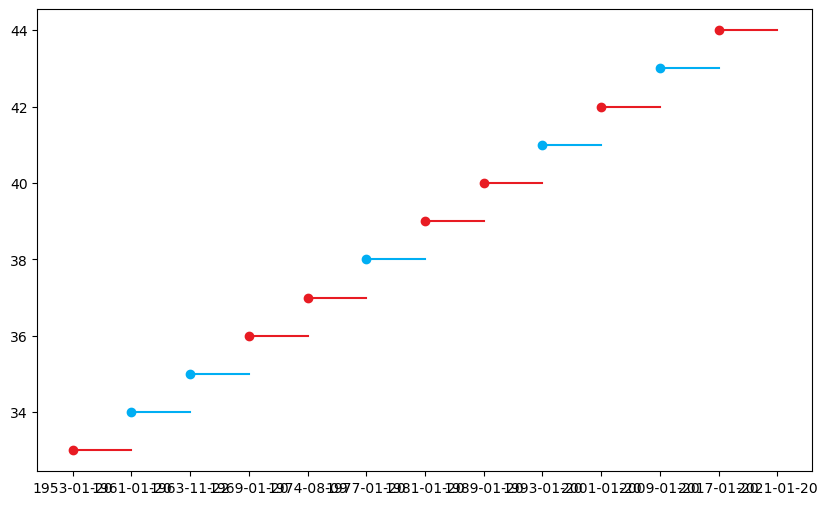

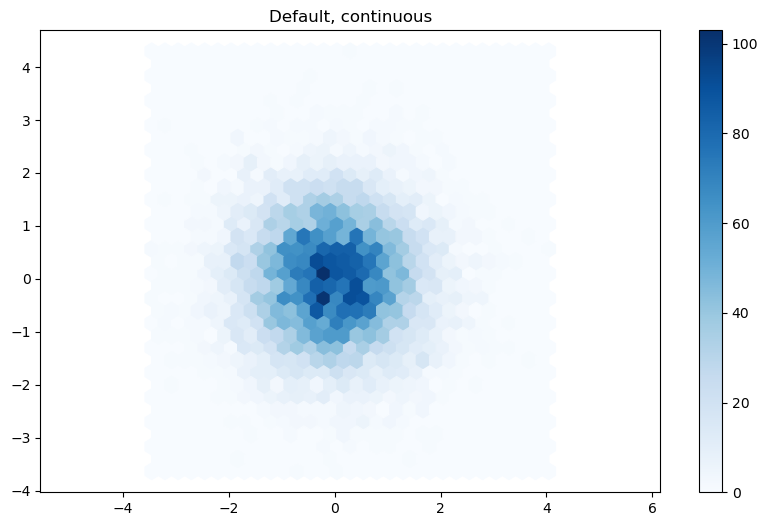

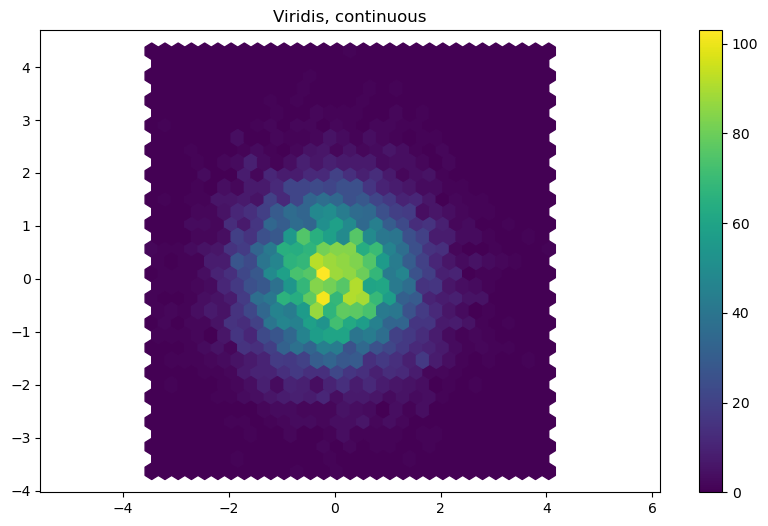

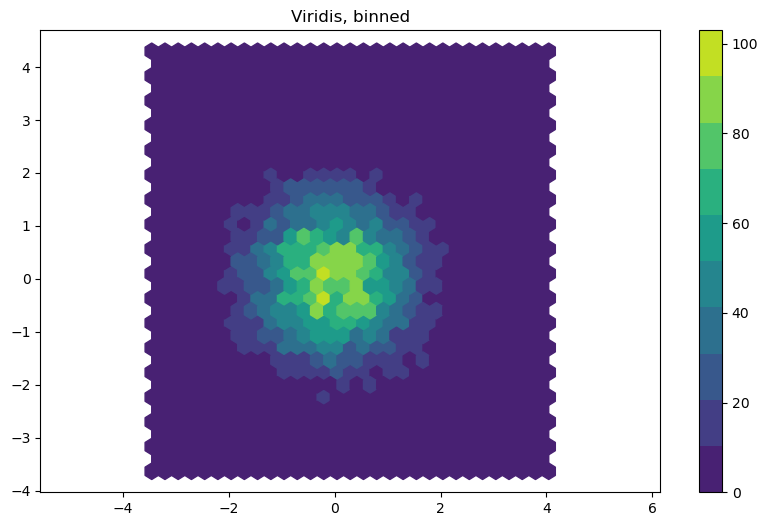

In [25]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))
colors = {'Republican': '#E81B23', 'Democratic': '#00AEF3'}
for _, row in presidential.iterrows():
    plt.plot([row['start'], row['end']], [row['id'], row['id']], color=colors[row['party']])
    plt.scatter(row['start'], row['id'], color=colors[row['party']])
plt.show()

# Generating the tibble-equivalent dataframe
df = pd.DataFrame({
    'x': np.random.randn(10000),
    'y': np.random.randn(10000)
})

# Default hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['x'], df['y'], gridsize=30, cmap="Blues")
plt.title("Default, continuous")
plt.xlabel(None)
plt.ylabel(None)
plt.axis('equal')
plt.colorbar()
plt.show()

# Using viridis colormap for continuous
plt.figure(figsize=(10, 6))
plt.hexbin(df['x'], df['y'], gridsize=30, cmap="viridis")
plt.title("Viridis, continuous")
plt.xlabel(None)
plt.ylabel(None)
plt.axis('equal')
plt.colorbar()
plt.show()

# For "binned" viridis, it's a bit tricky as matplotlib's hexbin doesn't have direct binning like ggplot.
# But we can kind of simulate this by customizing the colormap levels:
cmap = ListedColormap(sns.color_palette("viridis", n_colors=10))
plt.figure(figsize=(10, 6))
plt.hexbin(df['x'], df['y'], gridsize=30, cmap=cmap)
plt.title("Viridis, binned")
plt.xlabel(None)
plt.ylabel(None)
plt.axis('equal')
plt.colorbar()
plt.show()


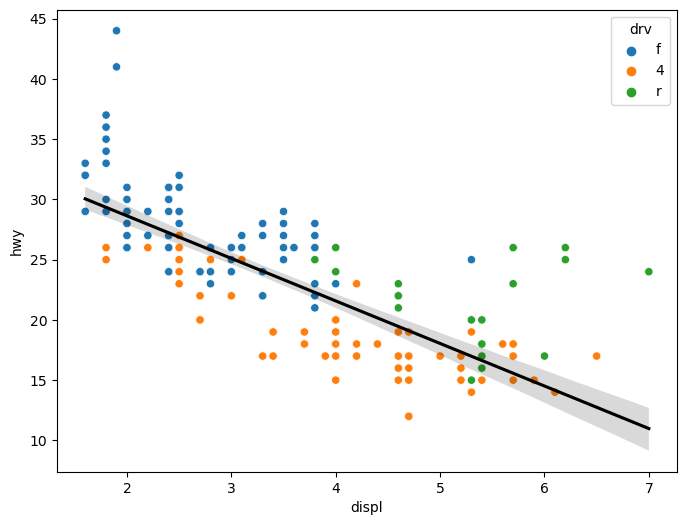

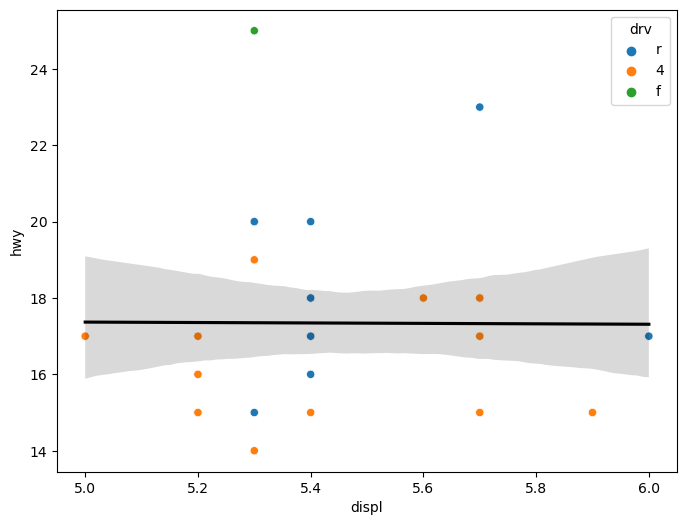

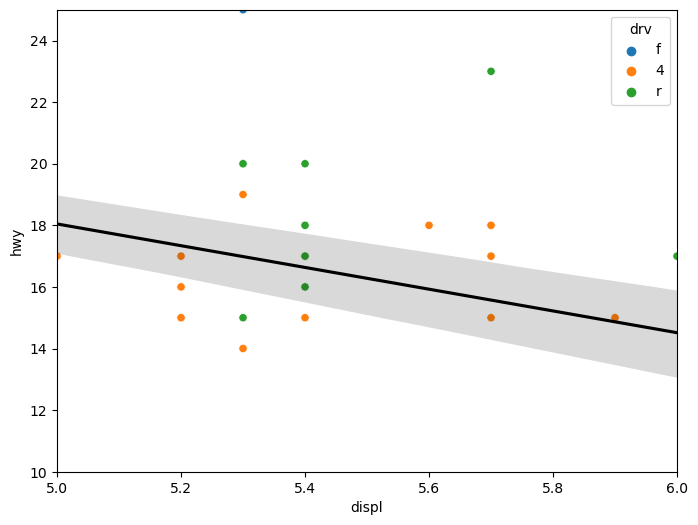

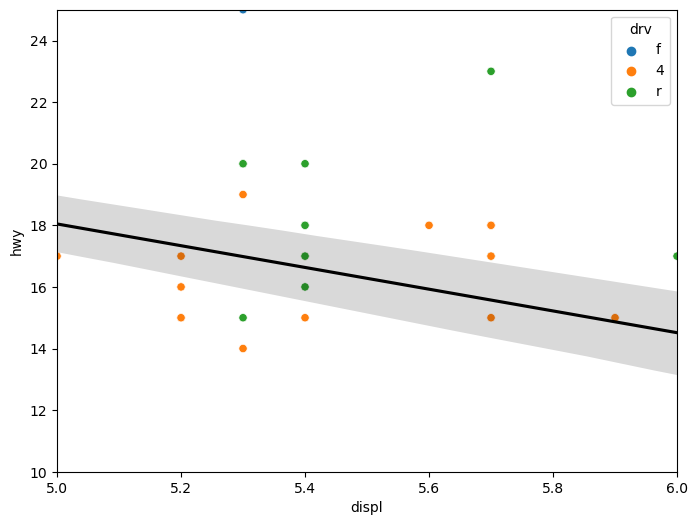

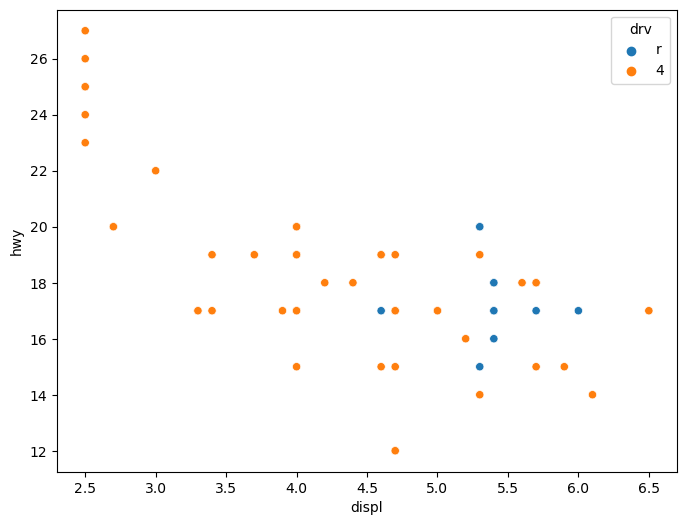

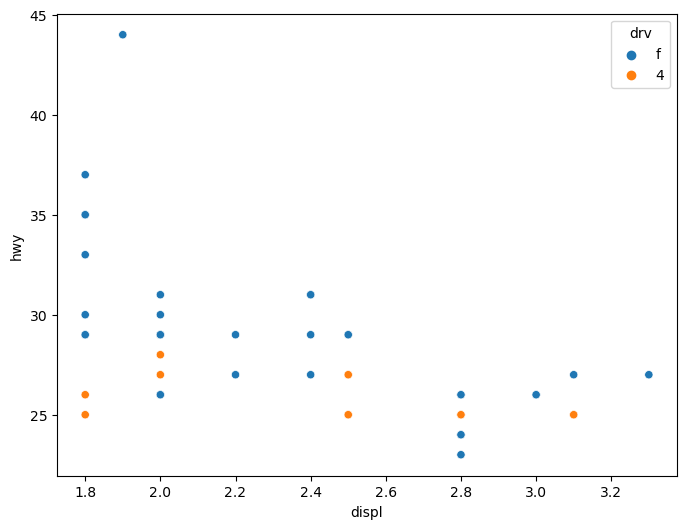

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the dataframe as mpg
mpg = pd.read_csv('data/mpg.csv')

# First plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=mpg)
sns.regplot(x='displ', y='hwy', data=mpg, scatter=False, color='black')
plt.show()

# Second plot
filtered_mpg = mpg[(mpg['displ'] >= 5) & (mpg['displ'] <= 6) & (mpg['hwy'] >= 10) & (mpg['hwy'] <= 25)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=filtered_mpg)
sns.regplot(x='displ', y='hwy', data=filtered_mpg, scatter=False, color='black')
plt.show()

# Third plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=mpg)
sns.regplot(x='displ', y='hwy', data=mpg, scatter=False, color='black')
plt.xlim(5, 6)
plt.ylim(10, 25)
plt.show()

# Fourth plot (similar to third, just another method of setting the limits)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=mpg)
sns.regplot(x='displ', y='hwy', data=mpg, scatter=False, color='black')
plt.gca().set_xlim(5, 6)
plt.gca().set_ylim(10, 25)
plt.show()

# suv and compact plots
suv = mpg[mpg['class'] == 'suv']
compact = mpg[mpg['class'] == 'compact']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=suv)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='displ', y='hwy', hue='drv', data=compact)
plt.show()


<Figure size 800x600 with 0 Axes>

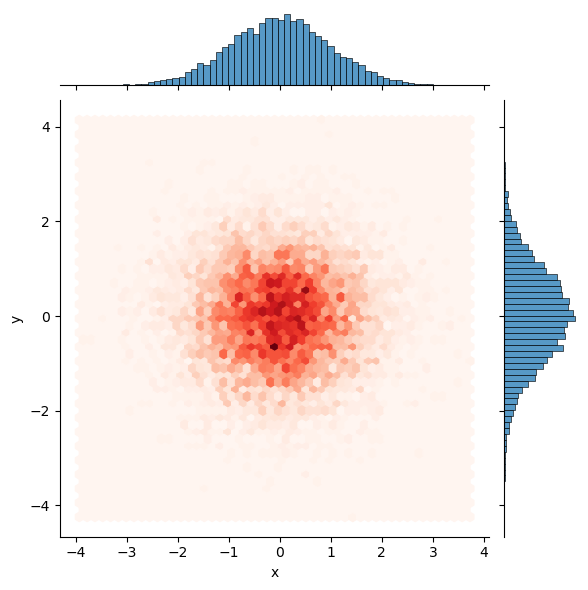

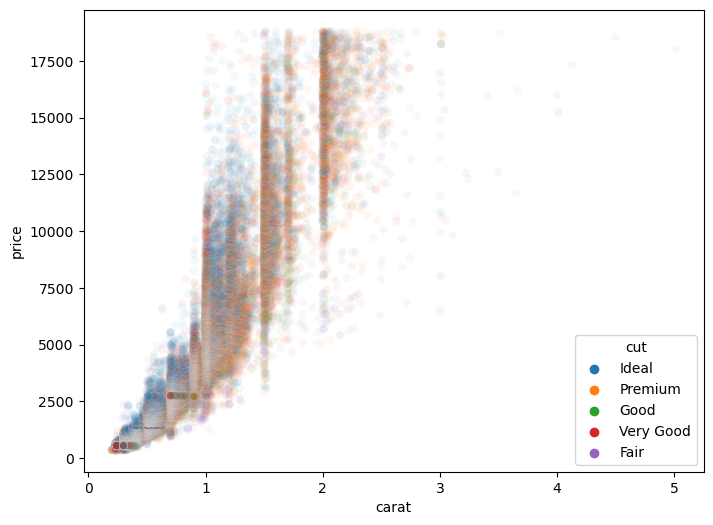

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_60563/3002792360.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


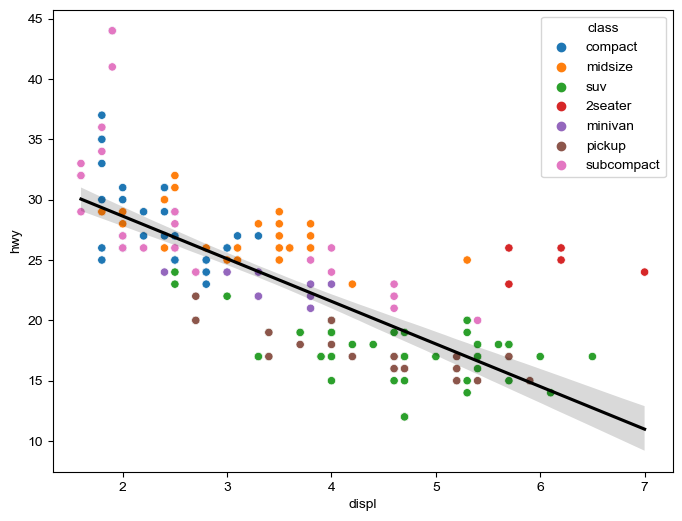

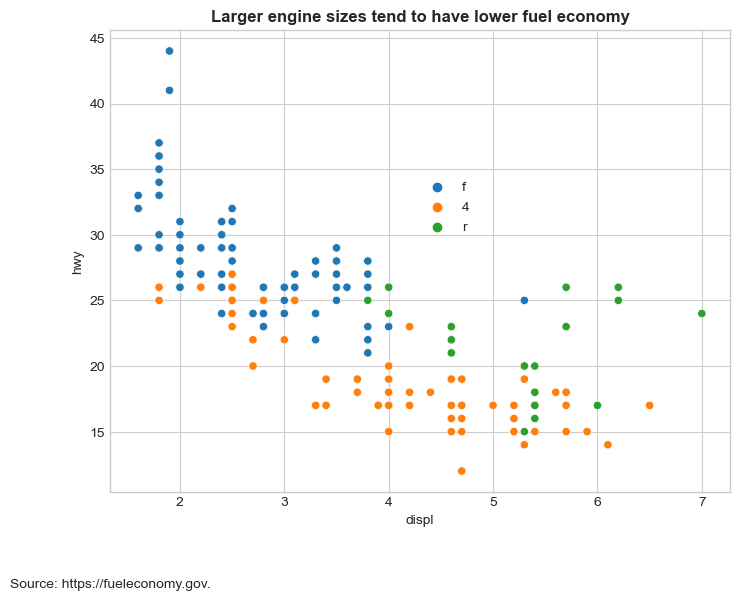

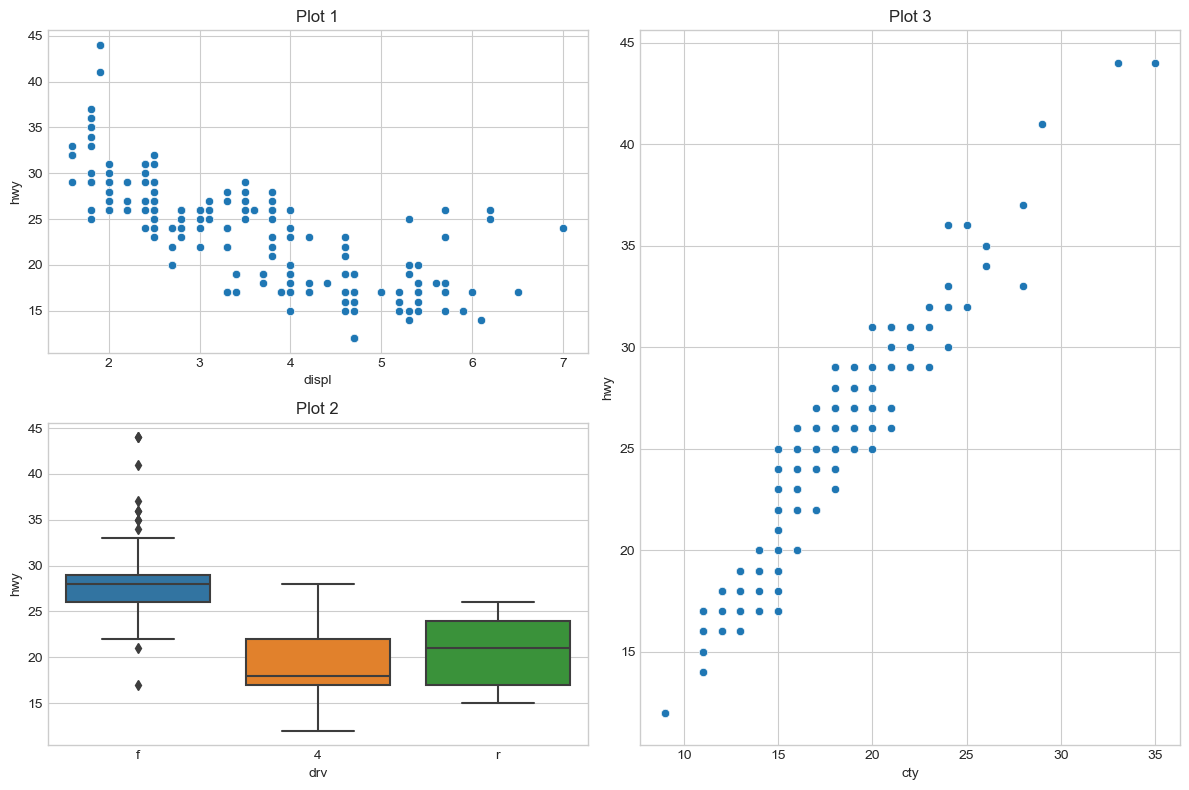

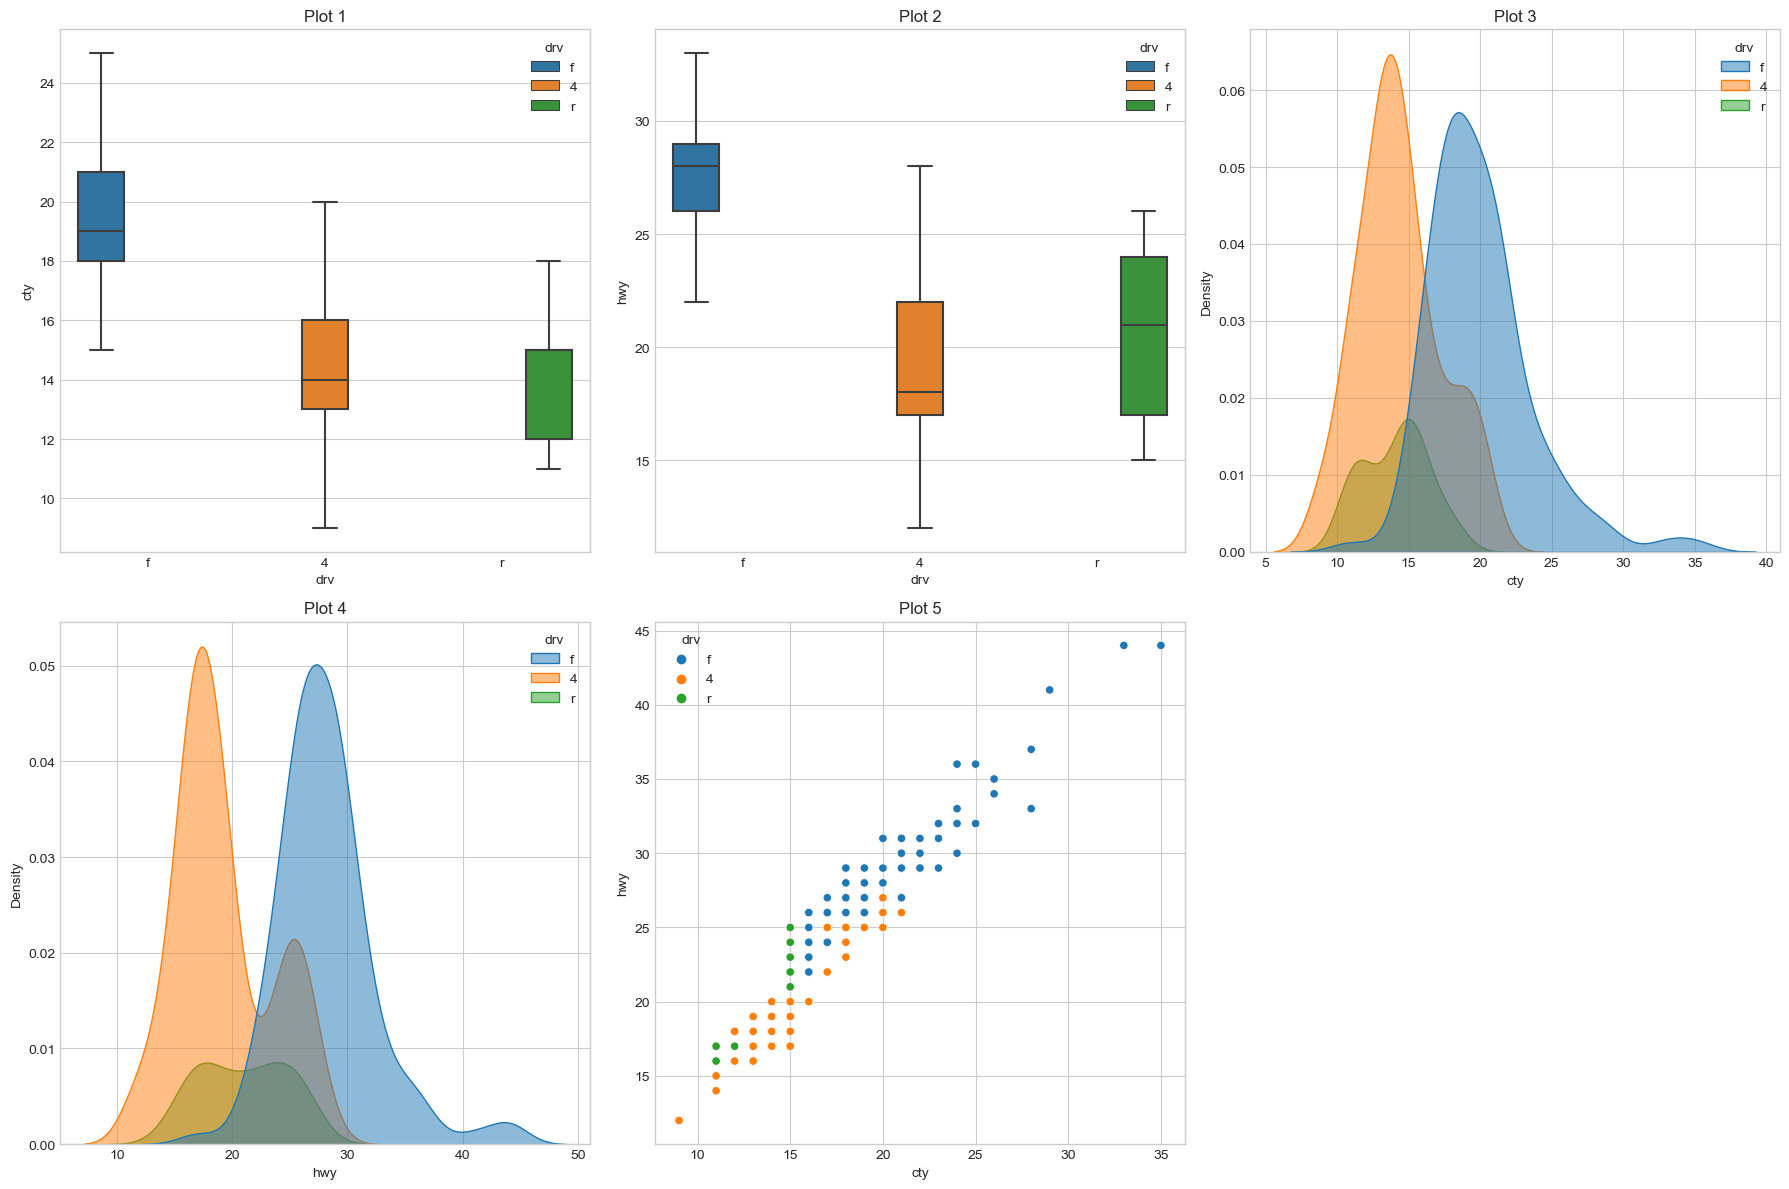

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Assuming you have loaded the dataframe as mpg and diamonds
mpg = pd.read_csv('data/mpg.csv')
diamonds = pd.read_csv('data/diamonds.csv')

# 1st plot
df = pd.DataFrame({
    'x': np.random.randn(10000),
    'y': np.random.randn(10000)
})

plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x="x", y="y", kind="hex", cmap="Reds")
plt.show()

# 2nd plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diamonds, x="carat", y="price", hue="cut", alpha=1/20)
plt.show()

# 3rd plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="class")
sns.regplot(data=mpg, x="displ", y="hwy", scatter=False, color="black")
plt.style.use('seaborn-whitegrid')
plt.show()

# 4th plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="drv")
plt.title("Larger engine sizes tend to have lower fuel economy", fontweight="bold")
plt.figtext(0, -0.05, "Source: https://fueleconomy.gov.", horizontalalignment="left")
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 0.7))
plt.show()

# Multiple plots combined
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[0, 0])
sns.scatterplot(data=mpg, x="displ", y="hwy", ax=ax0)
ax0.set_title("Plot 1")

ax1 = plt.subplot(gs[1, 0])
sns.boxplot(data=mpg, x="drv", y="hwy", ax=ax1)
ax1.set_title("Plot 2")

ax2 = plt.subplot(gs[:, 1])
sns.scatterplot(data=mpg, x="cty", y="hwy", ax=ax2)
ax2.set_title("Plot 3")
plt.tight_layout()
plt.show()

# Another set of multiple plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.boxplot(data=mpg, x="drv", y="cty", hue="drv", ax=axes[0, 0], showfliers=False).set_title("Plot 1")
sns.boxplot(data=mpg, x="drv", y="hwy", hue="drv", ax=axes[0, 1], showfliers=False).set_title("Plot 2")
sns.kdeplot(data=mpg, x="cty", hue="drv", fill=True, ax=axes[0, 2], alpha=0.5).set_title("Plot 3")
sns.kdeplot(data=mpg, x="hwy", hue="drv", fill=True, ax=axes[1, 0], alpha=0.5).set_title("Plot 4")
sns.scatterplot(data=mpg, x="cty", y="hwy", hue="drv", ax=axes[1, 1]).set_title("Plot 5")

# Remove the axis for the empty subplot
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


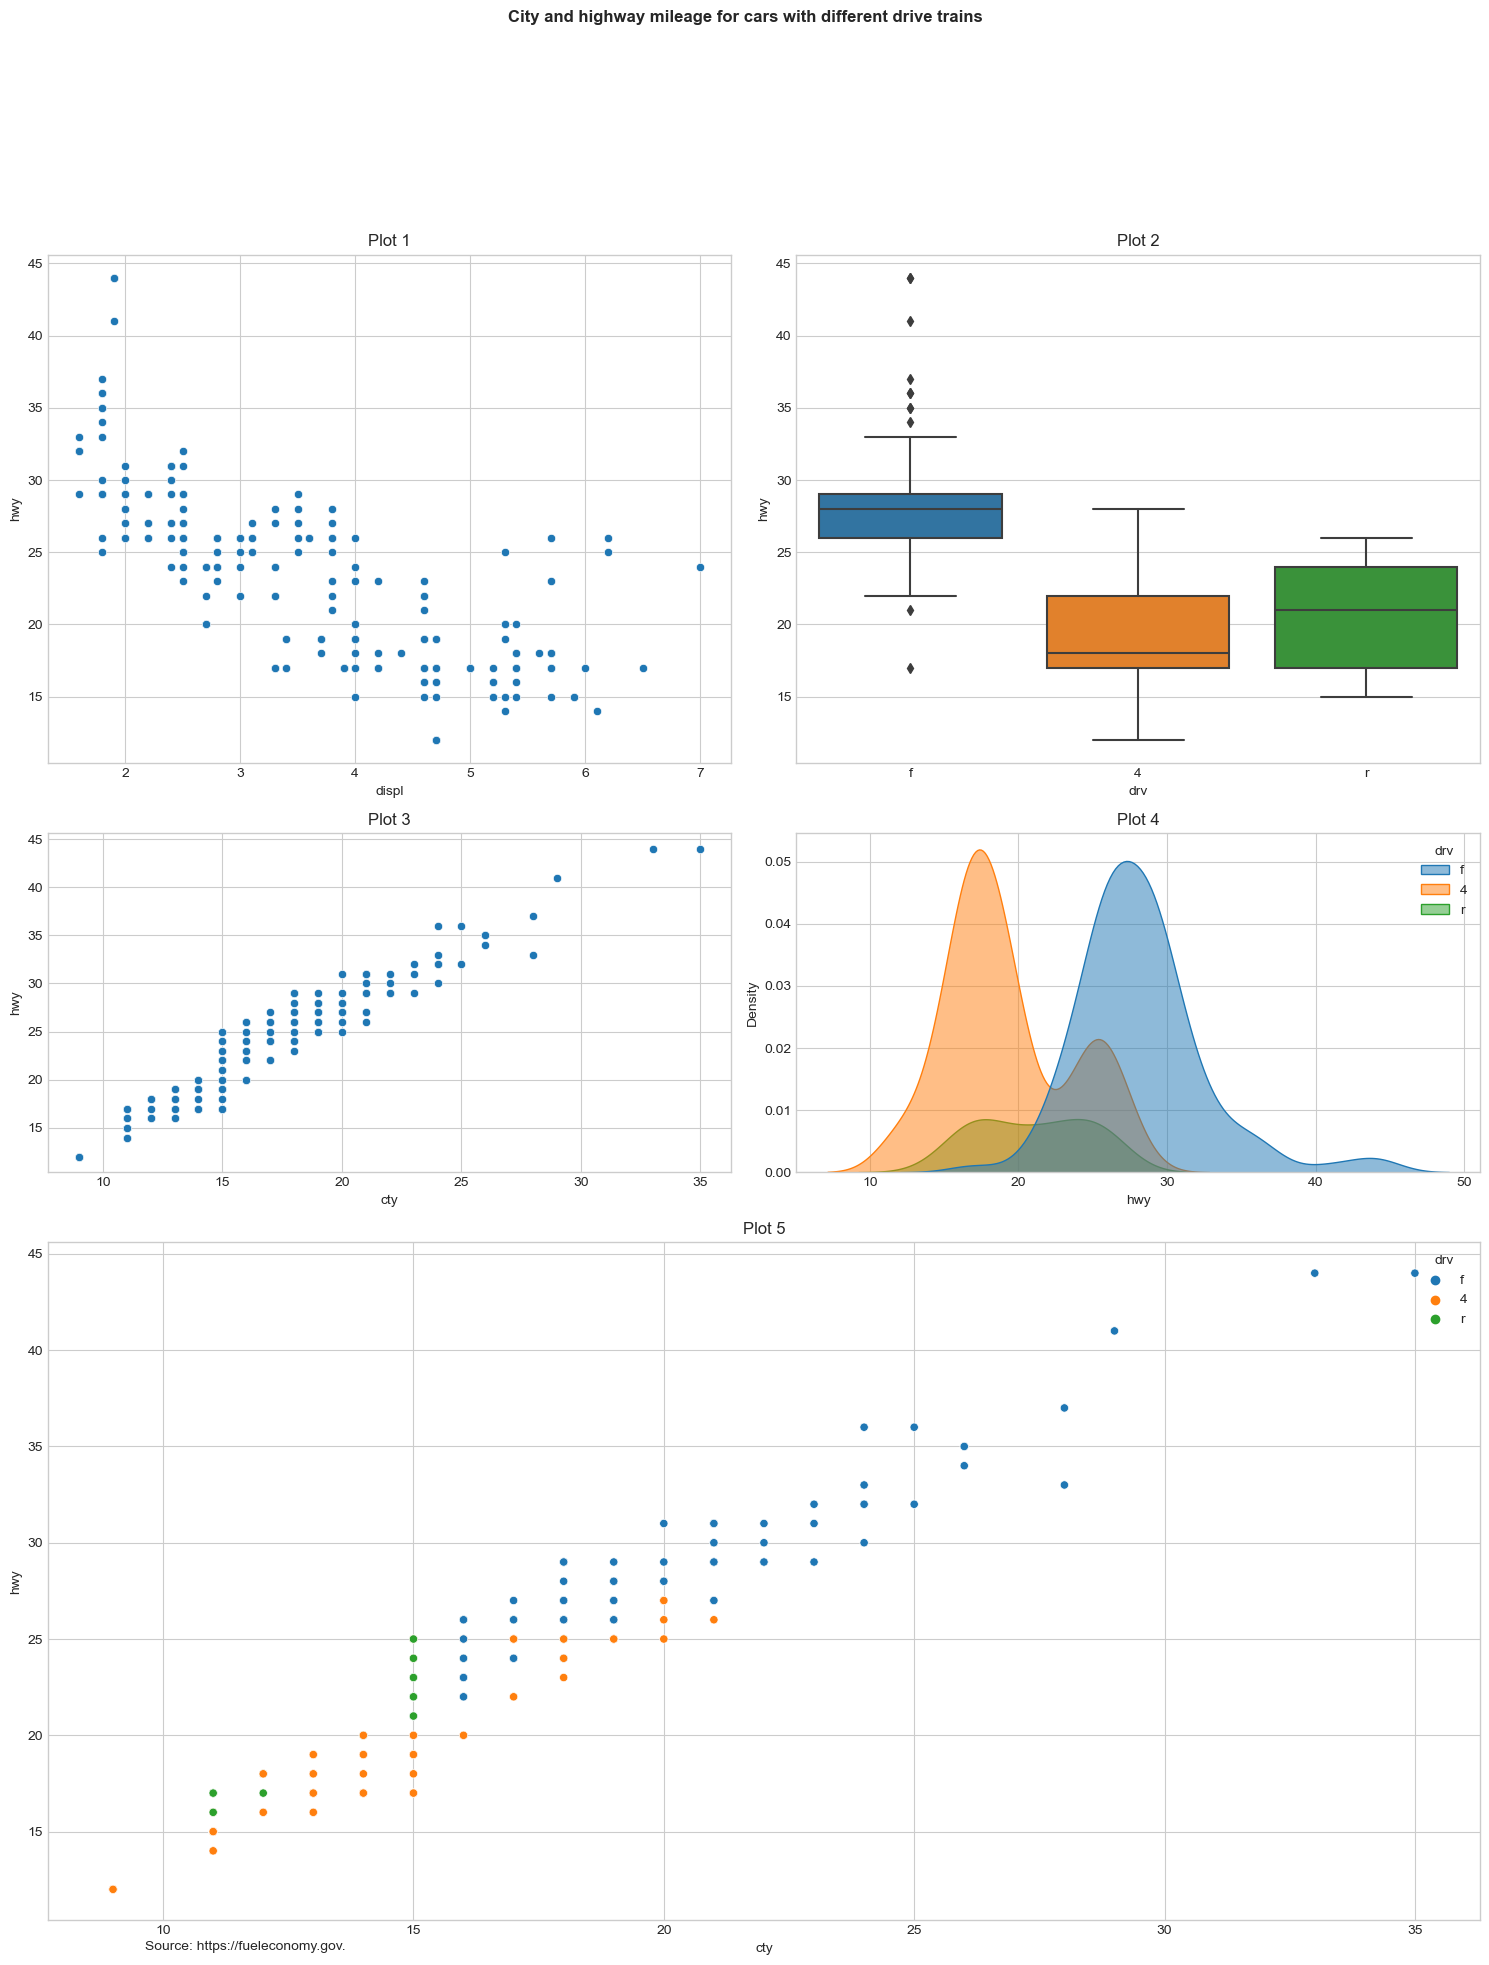

In [29]:
import matplotlib.gridspec as gridspec

# 1. Complex layout (guide_area() / (p1 + p2) / (p3 + p4) / p5)
fig = plt.figure(figsize=(15, 20))

# Define GridSpec
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 3, 2, 4])

# p1
ax1 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=mpg, x="displ", y="hwy", ax=ax1)
ax1.set_title("Plot 1")

# p2
ax2 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=mpg, x="drv", y="hwy", ax=ax2)
ax2.set_title("Plot 2")

# p3
ax3 = fig.add_subplot(gs[2, 0])
sns.scatterplot(data=mpg, x="cty", y="hwy", ax=ax3)
ax3.set_title("Plot 3")

# p4 (following previous logic)
ax4 = fig.add_subplot(gs[2, 1])
sns.kdeplot(data=mpg, x="hwy", hue="drv", fill=True, ax=ax4, alpha=0.5)
ax4.set_title("Plot 4")

# p5
ax5 = fig.add_subplot(gs[3, :])
sns.scatterplot(data=mpg, x="cty", y="hwy", hue="drv", ax=ax5)
ax5.set_title("Plot 5")

# Annotation and layout
fig.suptitle("City and highway mileage for cars with different drive trains", fontweight='bold')
plt.figtext(0.1, 0.01, "Source: https://fueleconomy.gov.", horizontalalignment="left")
plt.tight_layout()
plt.show()

# 2. Layouts: (p1 | p2) / p3, p1 | p2 /p3, and p1 / (p2 | p3)

# # (p1 | p2) / p3
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0, 0]).set_title("Plot 1")
# sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[0, 1]).set_title("Plot 2")
# sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[1, :]).set_title("Plot 3")
# plt.tight_layout()
# plt.show()

# # p1 | p2 / p3
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0]).set_title("Plot 1")
# sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[1]).set_title("Plot 2")
# sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[2]).set_title("Plot 3")
# plt.tight_layout()
# plt.show()

# # p1 / (p2 | p3)
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0, :]).set_title("Plot 1")
# sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[1, 0]).set_title("Plot 2")
# sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[1, 1]).set_title("Plot 3")
# plt.tight_layout()
# plt.show()


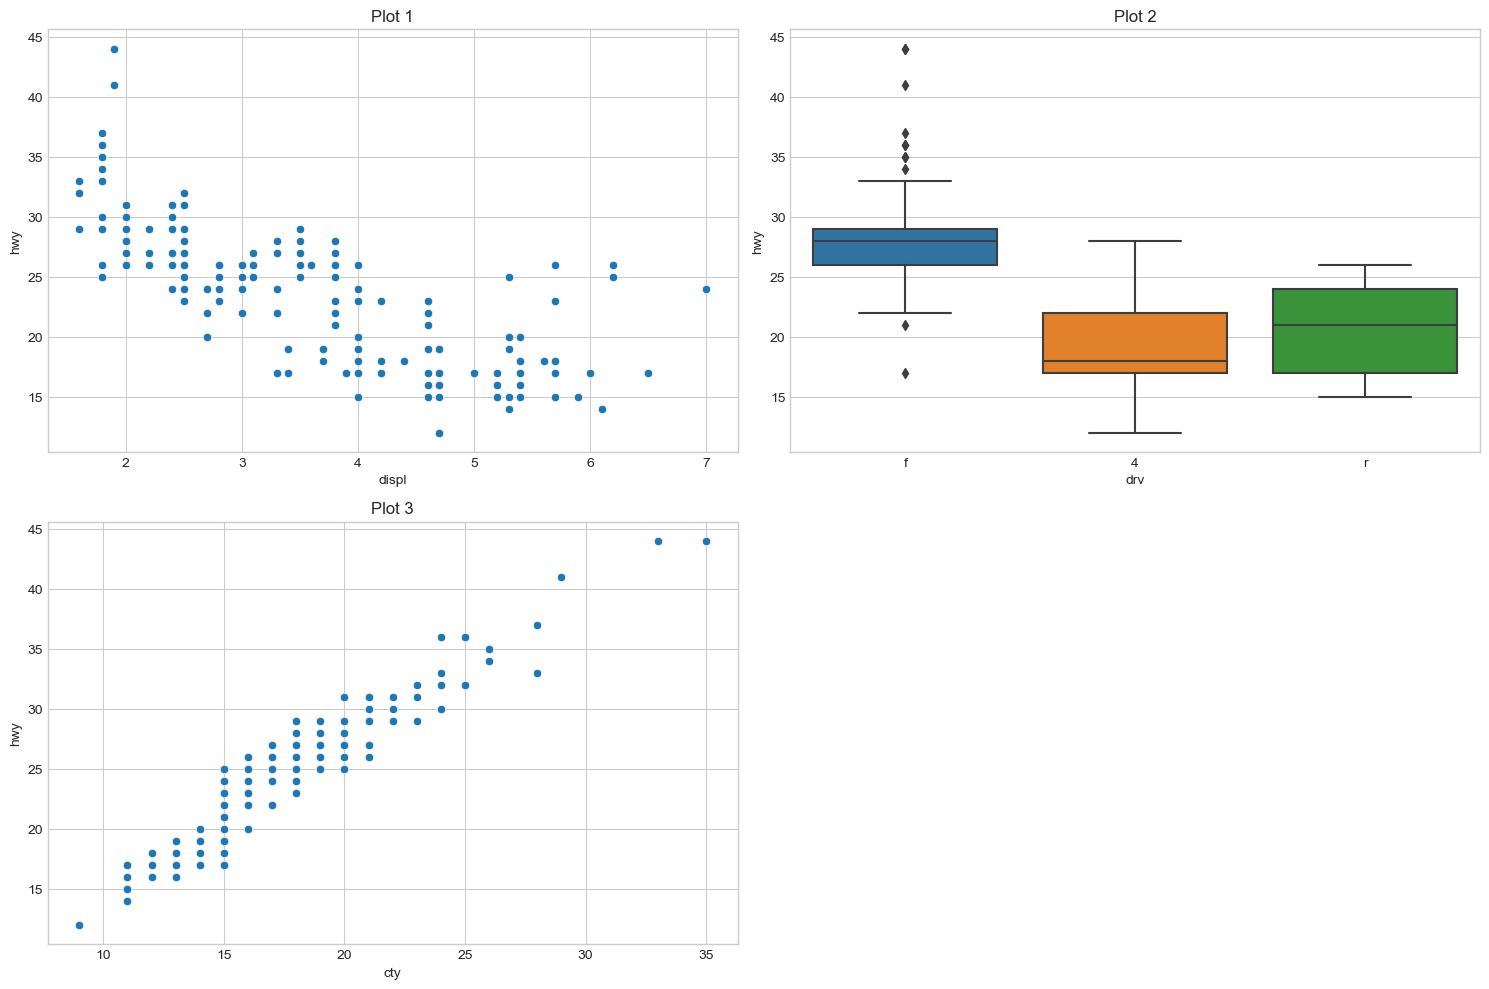

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0, 0]).set_title("Plot 1")
sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[0, 1]).set_title("Plot 2")
sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[1, 0]).set_title("Plot 3")
axes[1, 1].remove()  # remove the unused subplot
plt.tight_layout()
plt.show()


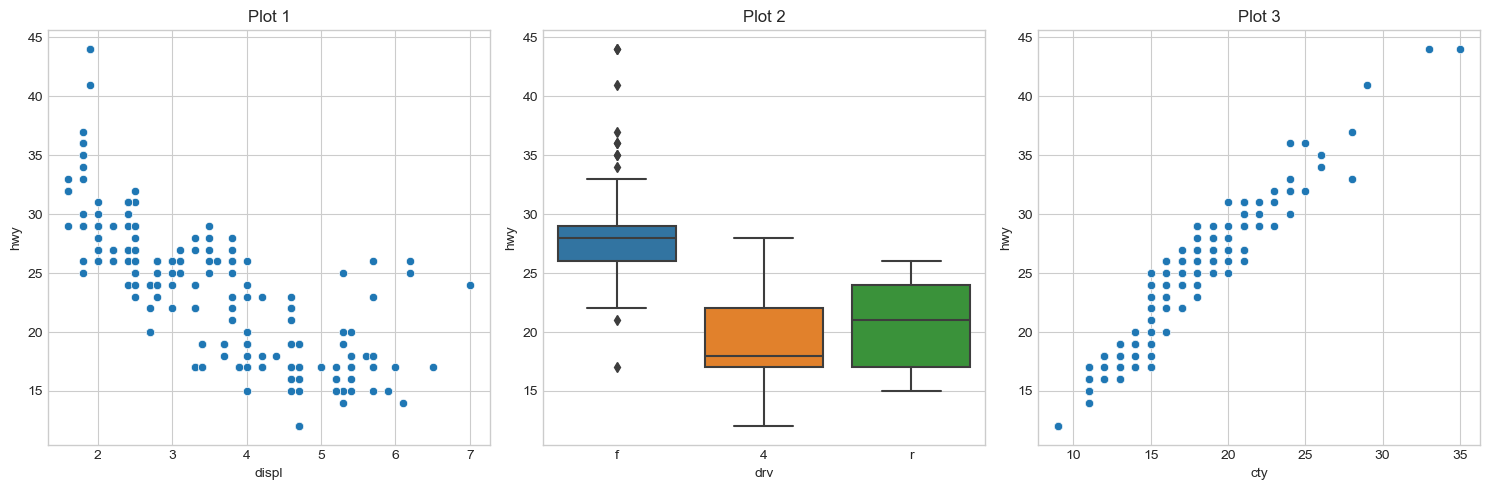

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0]).set_title("Plot 1")
sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[1]).set_title("Plot 2")
sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[2]).set_title("Plot 3")
plt.tight_layout()
plt.show()


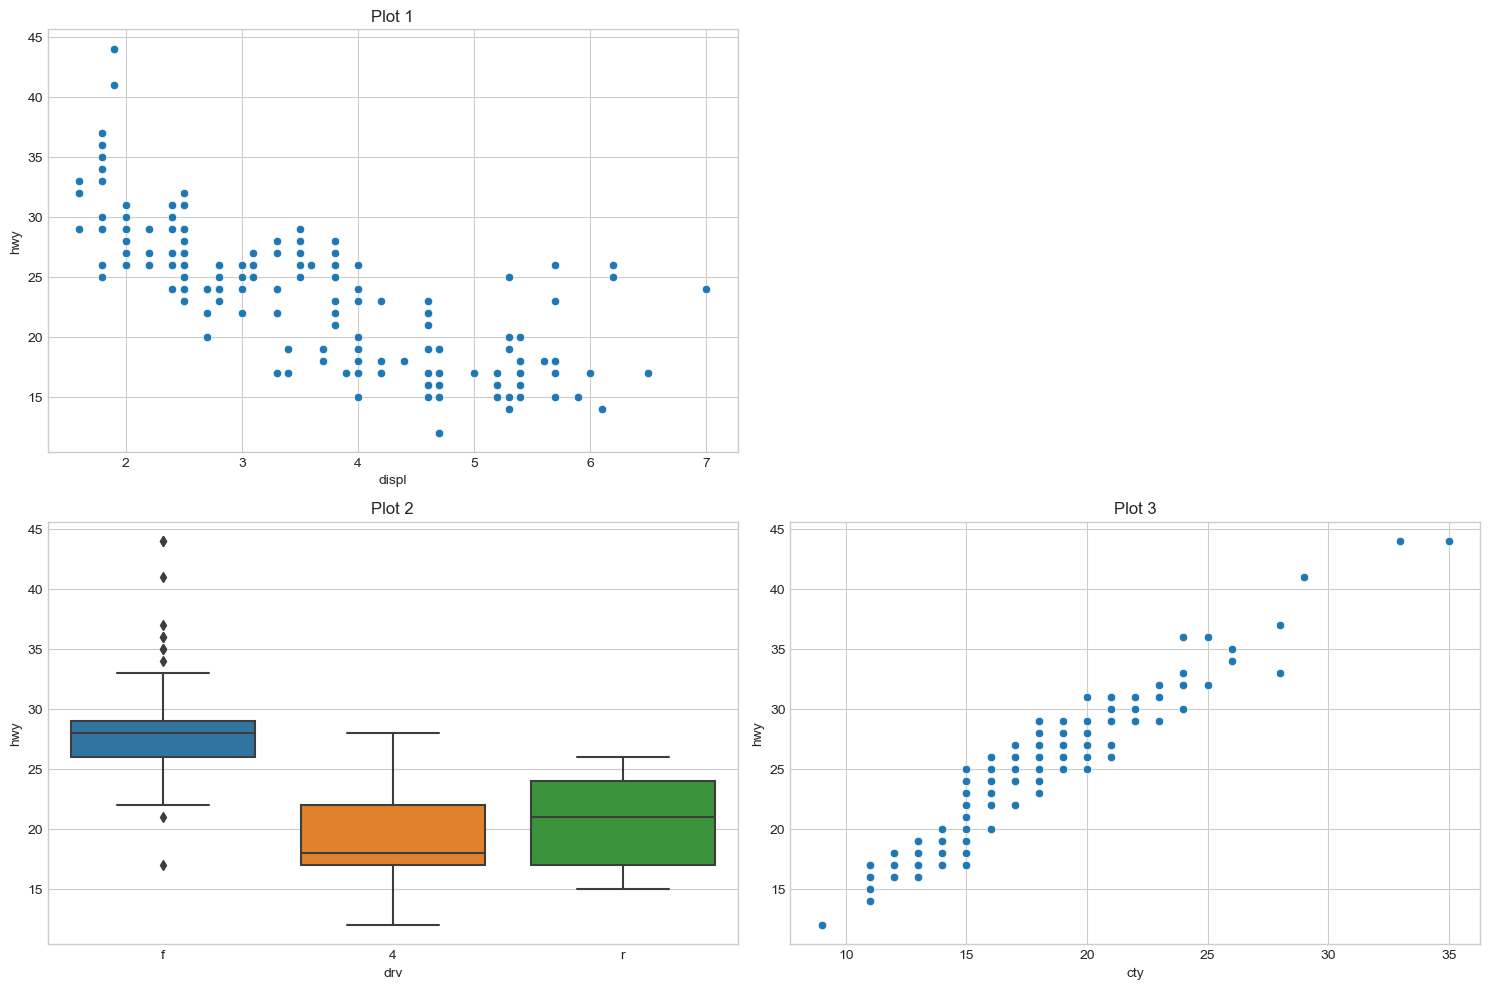

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=mpg, x="displ", y="hwy", ax=axes[0, 0]).set_title("Plot 1")
axes[0, 1].remove()  # remove the unused subplot
sns.boxplot(data=mpg, x="drv", y="hwy", ax=axes[1, 0]).set_title("Plot 2")
sns.scatterplot(data=mpg, x="cty", y="hwy", ax=axes[1, 1]).set_title("Plot 3")
plt.tight_layout()
plt.show()
